# Machine Learning in Python

In this tutorial, we will use [scikit-learn](https://scikit-learn.org/), an open source Python module featuring many well-known machine learning algorithms.

The input should be an $M\times N$ `numpy.array` (matrix), where $M$ is the number of samples, $N$ the number of features.

In the setting of vibration analysis, the number of features could be:
- Minimum/Maximum of the amplitude in the frequency spectre
- average
- mean
- squared error
- standard deviation
- kurtosis
- skewness
- variance
- sum
- fundamental frequency

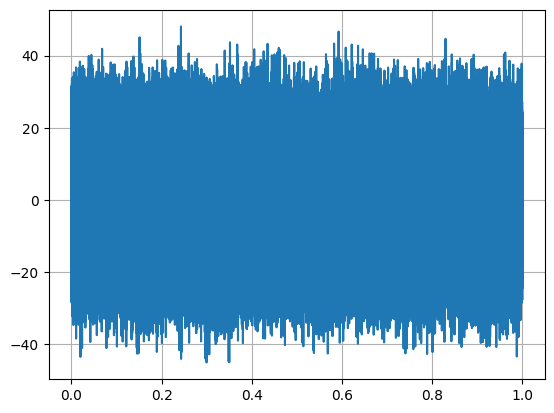

In [11]:
import numpy as np
import matplotlib.pyplot as plt
T = 1 # (s) Simulation time from banks paper
sampling_rate = 102.4e4 # (hz) Sampling rate from Banks paper
t = np.linspace(0, T, int(T*sampling_rate), endpoint=False)
frequency = 9
phase = 27*np.pi/180.
signal = np.sin(2*np.pi*frequency*t+phase) + 10*np.random.randn(len(t))
fig = plt.figure()
plt.plot(t, signal)
plt.grid()
plt.show()

We extract the magnitude of the FFT. As we have a real valued signal, we use this to only get the positive part of the spectrum (using `numpy.fft.rfft` and `numpy.fft.rfftfreq`)

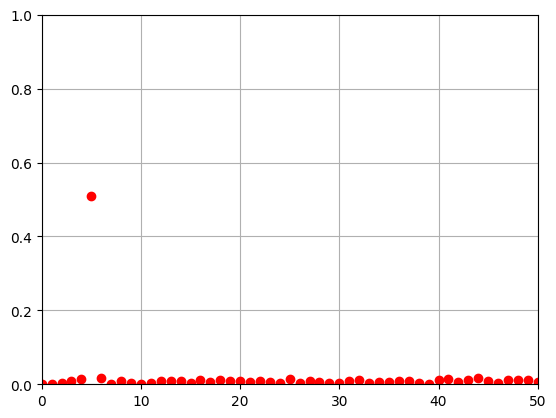

In [20]:
fft_np = np.fft.rfft(signal)
fft_freq = np.fft.rfftfreq(len(signal), d=1/sampling_rate)
fft_mag = np.abs(fft_np)/len(signal)
plt.plot(fft_freq, np.abs(fft_np)/len(signal), "ro")
plt.axis([0,50,0,1])
plt.grid()
plt.show()

Now we can extract som features

In [21]:
max_pos = np.argmax(fft_mag)
print(f"Maximum frequency magnitude {fft_mag[max_pos]} at {fft_freq[max_pos]}")
min_pos = np.argmin(fft_mag)
print(f"Maximum frequency magnitude {fft_mag[min_pos]} at {fft_freq[min_pos]}")

5.0 0.5102404268358935


In [ ]:
plt.plot(shift_freq, shift_mag)
plt.axis([-10, 10, 0, 1000000])
plt.show()